In [2]:
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spacy 

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import cess_esp
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from collections import Counter

nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('cess_esp')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('universal_tagset')

nlp = spacy.load('es_core_news_sm')

def leer_texto(archivo):
    
    """ontiene un string con el texto completro de un archivo

    Returns:
        _string_: 
        string: texto de un archivos
    """

    text = ''

    while(True):
        linea = archivo.readline()
        text = text+linea
        if not linea:
            break
    
    archivo.close
    
    return text

def depurar_texto(token_texto):
    """A partir de una lista de tokens con cadenas de texto
       crea un nuevo texto solo con aquellos tokens de caracteres
       para ello se aplica la validación isalpha()

    Args:
        token_texto (_list_): lista de tokens con palabras

    Returns:
        string: texto depurado solo con caracteres validos.
    """
    
    texto_depurado = ''
    for palabra in token_texto:
        if palabra.isalpha():
            texto_depurado = texto_depurado+' '+palabra
    
    return texto_depurado

sns.set_theme(style="white", context="talk")
    

[nltk_data] Downloading package words to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package cess_esp to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fredericksalazar/nltk_d

# Limpieza General de datos

se realizará un limpieza general de los archivos a procesar con base en las siguientes reglas definidas:

- todo estará en minusculas
- se reemplazará caracter - por vacio
- se eliman los saltos de linea \n por vacio


In [3]:
path_petro = './archivos/petro.pdf.txt'
path_fajardo = './archivos/fajardo.pdf.txt'

archivo_petro = open(path_petro, 'r', encoding='utf8')
archivo_fajardo = open(path_fajardo, 'r', encoding='utf8')

texto_petro = leer_texto(archivo_petro)
texto_fajardo = leer_texto(archivo_fajardo)

In [4]:
#Reemplazamos caracteres incomodos que son usados en el texto, convertimos todo a minusculas para mejor procesamiento

texto_petro = texto_petro.lower()
texto_fajardo = texto_fajardo.lower()


# Tokenización

Como paso fundamental en el NLP la tokenización nos permite tomar un texto entero y dividirlo en cada una de las palabras que lo componen, esta división permitirá posteriormente entender las palabras usadas.

In [5]:
#hacemos uso del modulo word_tokenize de nltk para separar cada una de las palabras usadas

token_petro = word_tokenize(texto_petro)
token_fajardo = word_tokenize(texto_fajardo)

len_token_petro = len(token_petro)
len_token_fajardo = len(token_fajardo)


In [6]:
print('total palabras usadas en documento petro: ', len_token_petro)
print('total palabras usadas en documento fajardo: ', len_token_fajardo)

total palabras usadas en documento petro:  28806
total palabras usadas en documento fajardo:  25038


# Texto Depurado

Se creará un nuevo texto totalmente depurado en el cual se eliminan caracteres especiales, signos de puntuacion, numeros entro otros.

In [7]:

texto_petro_depurado = depurar_texto(token_petro)
texto_fajardo_depurado = depurar_texto(token_fajardo)

#volvemos a calcular los tokens de cada texto

token_petro = word_tokenize(texto_petro_depurado)
token_fajardo = word_tokenize(texto_fajardo_depurado)

print('total nuevos tokens petro: ', len(token_petro))
print('total nuevos tokens fajardo: ', len(token_fajardo))


total nuevos tokens petro:  26146
total nuevos tokens fajardo:  13247


In [8]:
#vamos a evidenciar la cantidad total de palabras en cada uno de los textos 

dict_len_textos = {'texto_petro': len_token_petro,
                   'texto_fajardo': len_token_fajardo}

dict_len_items = dict_len_textos.items()

df_lenght_textos = pd.DataFrame(list(dict_len_items))
df_lenght_textos.columns=['texto', 'total']
df_lenght_textos

,texto,total
0,texto_petro,28806
1,texto_fajardo,25038


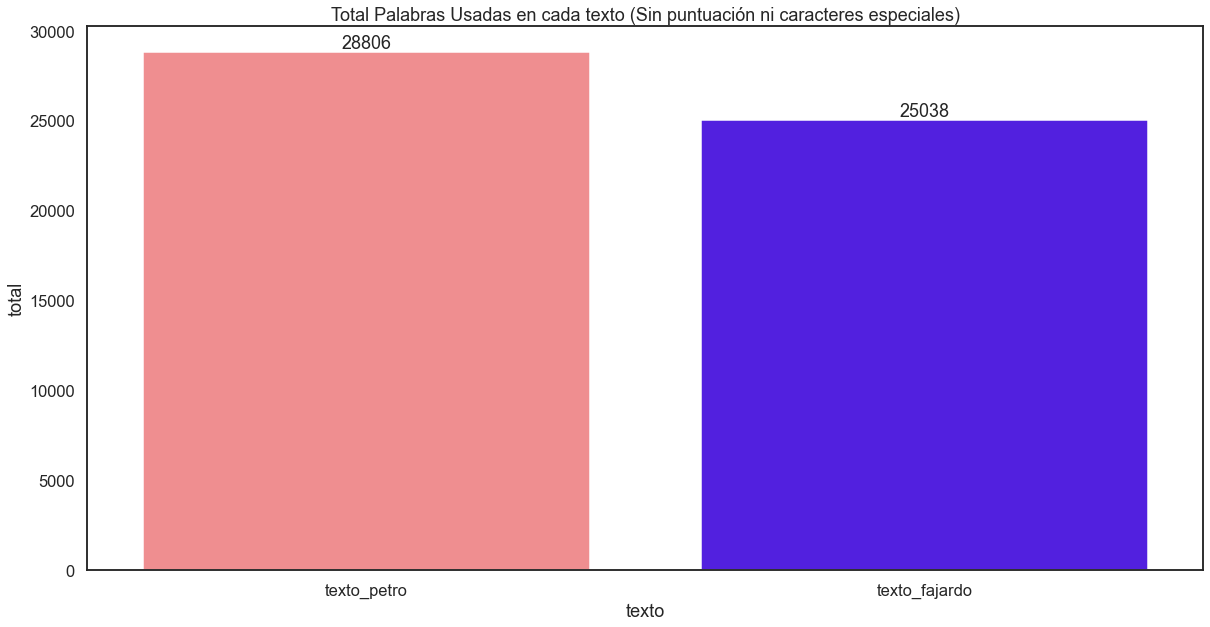

In [9]:
plt.figure(figsize=(20,10))
plt.title('Total Palabras Usadas en cada texto (Sin puntuación ni caracteres especiales)')

ax = sns.barplot(data=df_lenght_textos,
                 x='texto', 
                 y='total',
                 palette='gnuplot2_r')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# Eliminando Stop Words

Vamos a quitar las stop words que no aportan valor al texto 

In [10]:
es_stop_words = stopwords.words('spanish')

print(len(es_stop_words))

313


In [11]:
#Creamos una lista de palabras eliminando las palabras stop word del español de los textos

lis_palabras_petro_stp = [words for words in token_petro if words not in es_stop_words]
lis_palabras_fajardo_stp = [words for words in token_fajardo if words not in es_stop_words]

#obtenemos el tamaño de la lista de palabras 
len_wstp_petro = len(lis_palabras_petro_stp)
len_wstp_fajardo = len(lis_palabras_fajardo_stp)

print('total palabras petro sin stopwords: ',len(lis_palabras_petro_stp))
print('total palabras petro sin stopwords: ',len(lis_palabras_fajardo_stp))

#se crea diccionario con los resultados
dict_len_wstp_textos = {'texto_petro': len_wstp_petro,
                        'texto_fajardo': len_wstp_fajardo}

dict_len_items_wstp = dict_len_wstp_textos.items()

#crea pandas DataFrame con los valores obtenidos
df_lenght_textos_wstp = pd.DataFrame(list(dict_len_items_wstp))
df_lenght_textos_wstp.columns=['texto_wstp', 'total_wstp']
df_lenght_textos_wstp

total palabras petro sin stopwords:  13732
total palabras petro sin stopwords:  7184


,texto_wstp,total_wstp
0,texto_petro,13732
1,texto_fajardo,7184


In [12]:
#vamos a crear un dataframe total con los datos de total palabras inicicales y total palabras sin stopwords

df_diff_len_textos = df_lenght_textos.merge(df_lenght_textos_wstp, left_on='texto', right_on='texto_wstp', how='inner')
df_diff_len_textos = df_diff_len_textos.drop(['texto_wstp'], axis=1)

df_diff_len_textos['total palabras stopwords'] = (df_diff_len_textos['total']-df_diff_len_textos['total_wstp'])
df_diff_len_textos['% palabras con valor'] = df_diff_len_textos['total_wstp']/df_diff_len_textos['total']*100
df_diff_len_textos['% palabras con stopwords'] = df_diff_len_textos['total palabras stopwords']/df_diff_len_textos['total']*100

df_diff_len_textos.columns =['texto',
                             'total palabras usadas',
                             'total palabras sin stopwords',
                             'total palabras stopwords',
                             '% palabras con valor',
                             '% palabras sin valor']

df_diff_len_textos

,texto,total palabras usadas,total palabras sin stopwords,total palabras stopwords,% palabras con valor,% palabras sin valor
0,texto_petro,28806,13732,15074,47.670624,52.329376
1,texto_fajardo,25038,7184,17854,28.692388,71.307612


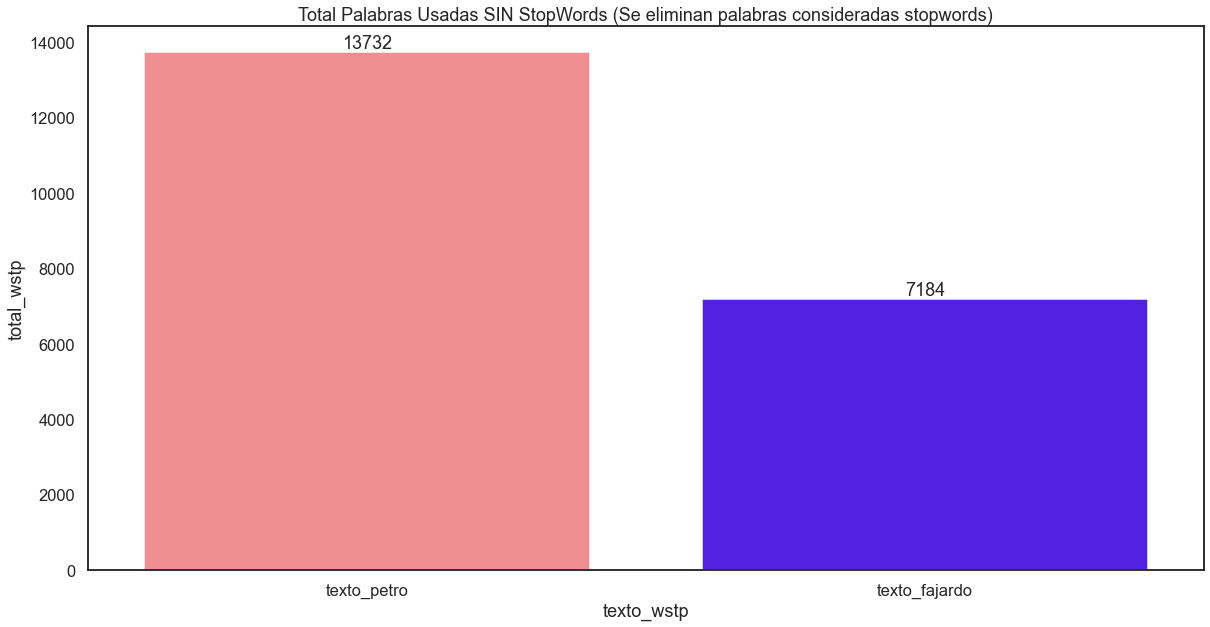

In [13]:
plt.figure(figsize=(20,10))
plt.title('Total Palabras Usadas SIN StopWords (Se eliminan palabras consideradas stopwords)')

ax = sns.barplot(data=df_lenght_textos_wstp,
                 x='texto_wstp', 
                 y='total_wstp',
                 palette='gnuplot2_r')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

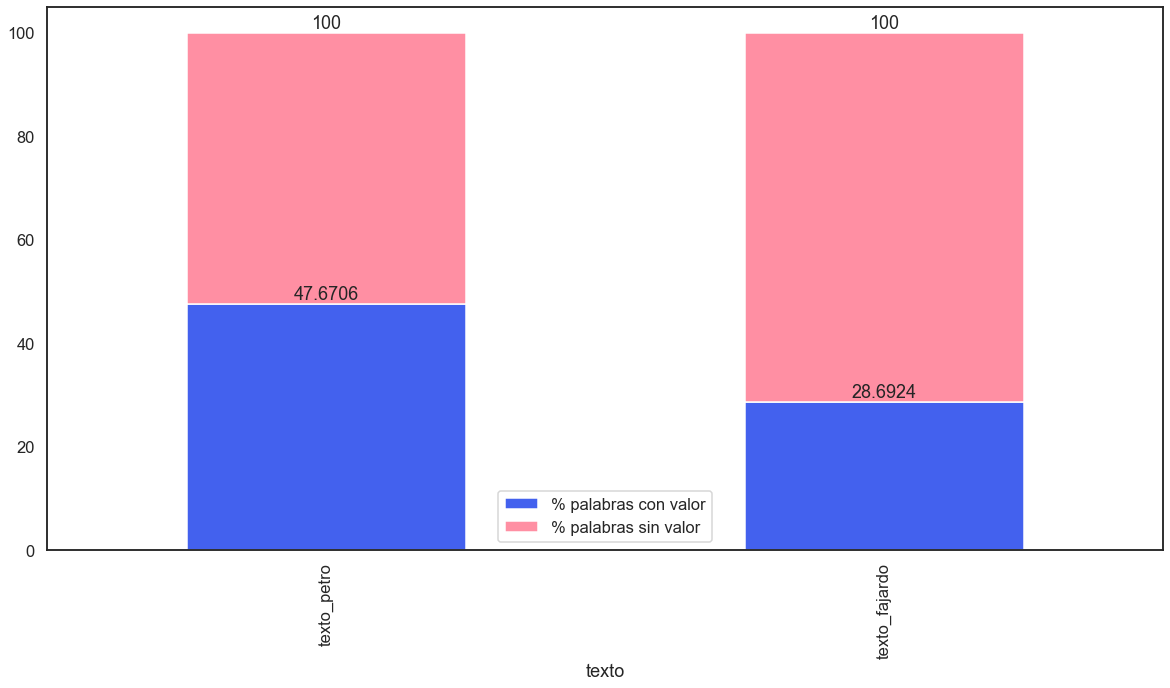

In [14]:
#cremos un grafico que muestre la distribucion de palabras en cada texto 

stck_bar_plot = df_diff_len_textos.plot.bar(x='texto',
                                            y=['% palabras con valor', '% palabras sin valor'],
                                            stacked = True,
                                            figsize=(20,10),
                                            color=["#4361ee", "#ff8fa3"])

for i in stck_bar_plot.containers:
    stck_bar_plot.bar_label(i,)



# etiquetado de palabras y lematización

El POS Tag nos permite etiquetar una palabra según sea su naturaleza, asi podremos comprender mejor la composición de un documento en verbos, adjetivos, nombres, pronombres, adverbios etc. este proceso es fundamental para reducir y mejorar el conteo de palabras usando la tecnica de lematización que nos permitirá encontrar la palabra origen de palabras usadas en diferentes tiempos o formas: ej casas, casa = casa | 

para este proceso usaremos la libreria SpaCy

Listado de POS_tag 

- ADJ -> Adjetivo
- ADP -> Adposicion
- ADV -> Adverbio
- AUX -> Auxiliar
- DET -> Determinador
- INTJ -> Interjección
- NOUN -> Sustantivo
- NUM -> Numeral
- PART -> Particula
- PRON -> Pronombre
- PROPN -> Nombre propio
- PUNCT -> Puntuación
- VERB -> Verbo

In [43]:
#cargamos nuestro texto depurado a nlp para generar un Doc Spacy

lis_lema_petro = []
lis_lema_fajardo = []

tag_petro = []
tag_fajardo = []

sp_doc_petro = nlp(depurar_texto(lis_palabras_petro_stp))
sp_doc_fajardo = nlp(depurar_texto(lis_palabras_fajardo_stp))

#se crea una matrix con las palabras, su postag y su lemma para el texto de petro
for token in sp_doc_petro:
    tag_petro.append([token.text, token.pos_, token.lemma_, ])
    
#Se crea una matrix con las palabras su postag y su lemma para el texto de fajardo

for token in sp_doc_fajardo:
    tag_fajardo.append([token.text, token.pos_, token.lemma_, ])


In [44]:
#Procedemos a crear una lista con las palabras lematizadas de cada texto, nos permitirá construir nuestro bag of words.

for row in tag_petro:
    lis_lema_petro.append(row[2])
    
for row in tag_fajardo:
    lis_lema_fajardo.append(row[2])
    
